In [1]:
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
n = 8
theta = 0.5
binom.pmf(k, n, theta) # probability mass function

array([0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
       0.21875   , 0.109375  , 0.03125   , 0.00390625, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

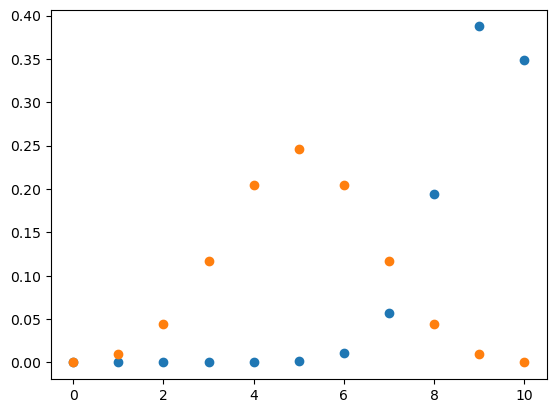

In [3]:
k = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n = 10
theta = 0.9
plt.scatter(k, binom.pmf(k, n, theta))
plt.scatter(k, binom.pmf(k, n, 0.5))

/tmp/ipykernel_316054/2244522177.py:2: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(x)


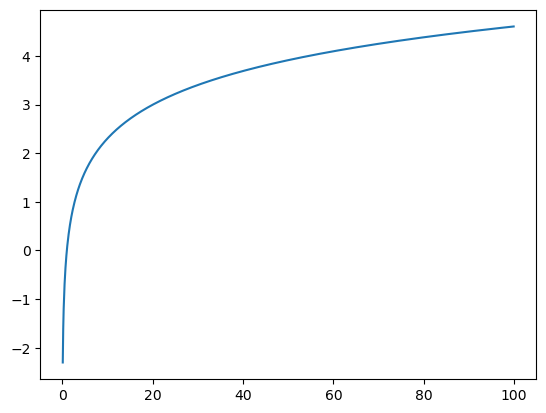

In [4]:
x = np.arange(0, 100, 0.1)
log_x = np.log(x)

plt.plot(x, log_x)


In [5]:
theta = np.array([0.5, 0.9])
n = 10
k = 9
verosimilitud = (theta ** k) * (1 - theta) ** (10 - k)
print(
    f'theta={theta[0]}, ver={verosimilitud[0]}'
)
print(
    f'theta={theta[1]}, ver={verosimilitud[1]}'
)

theta=0.5, ver=0.0009765625
theta=0.9, ver=0.0387420489


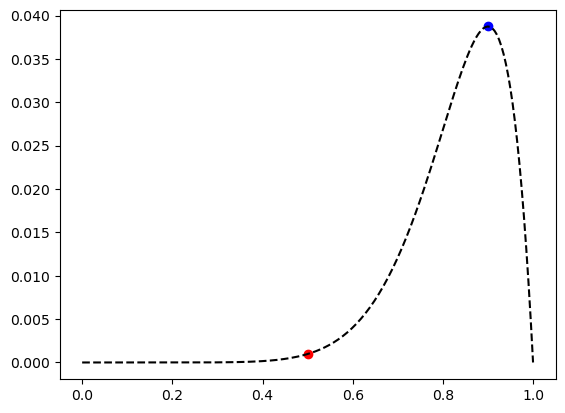

In [6]:
k=9
n=10
theta_1=0.5
theta_2=0.9
theta_vec=np.linspace(0, 1, 200)

def likelihood_bernoulli(k, n, theta):
    return (theta ** k) * (1-theta)**(n-k)
# verosimilitud para vector de thetas (n=200)
like_vec = likelihood_bernoulli(k, n, theta_vec)
# verosimilitud de theta = 0.5
like_1 = likelihood_bernoulli(k, n, theta_1)
# verosimilitud de theta=0.9
like_2 = likelihood_bernoulli(k, n, theta_2)

plt.plot(theta_vec, like_vec, 'k--')
plt.scatter(theta_1, like_1, color='r')
plt.scatter(theta_2, like_2, color='blue')

## Obtener el MLE en Python usando métodos numéricos

$$
p(k; \theta, n) = \binom{n}{k} \theta^k (1-\theta)^{n-k}
$$

/tmp/ipykernel_316054/2193600916.py:8: RuntimeWarning: divide by zero encountered in log
  return -(k * np.log(theta) + (n - k) * np.log(1 - theta))


Text(0.7199919991999201, 9.75248921841246, 'argmax $l(\\theta)={0.9}$')

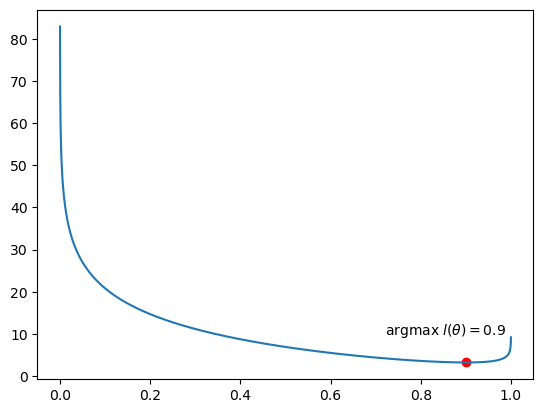

In [7]:
from math import *
from scipy.optimize import minimize
from scipy.optimize import Bounds

# definir binomial

def binom_log_lik(n, k, theta):
    return -(k * np.log(theta) + (n - k) * np.log(1 - theta))

# grid search: definir múltiples valores para el parámetro candidato (theta)
n = 10
k = 9

step = 0.0001

grid = np.linspace(0, 1, int(1 / step))
neg_log_like = binom_log_lik(n, k, grid)
ind_arg_min = np.argmin(neg_log_like)
grid[ind_arg_min]

plt.plot(grid, neg_log_like)
plt.scatter(grid[ind_arg_min], np.min(neg_log_like), c='red')
plt.text(
    grid[ind_arg_min] * 0.8, np.min(neg_log_like) * 3,
    s=f'argmax $l(\\theta)={{{ round(grid[ind_arg_min], 3) }}}$'
)

In [8]:
# minimizar usando minimize de optimize
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [9]:
n=1000
k=9
theta_0=0.8

def binom_log_lik(theta, n, k):
    theta = np.clip(theta, 1e-10, 1 - 1e-10)
    # negar para hacerla convexa
    ll = k * np.log(theta) + (n - k) * np.log(1 - theta)
    neg_ll = -ll
    return neg_ll

res = minimize(binom_log_lik, # funcion convexa (minimizar)
               theta_0, # parámetro inicial (en donde comenzar la búsqueda)
               args=(n,k), # constantes; no se buscan, por lo tanto se declaran
               method='L-BFGS-B', # método de búsqueda
               options={'maxiter': 100000}, # si no converge, aumentar la cantidad de iteraciones
               bounds=[(0, 1)]) # restrictiones para hacer la búsqueda de candidatos a theta

print(res.x, k/n)

[0.009] 0.009


In [10]:
res = minimize(binom_log_lik, # funcion convexa (minimizar)
               theta_0, # parámetro inicial (en donde comenzar la búsqueda)
               args=(n,k), # constantes; no se buscan, por lo tanto se declaran
               method='Nelder-Mead') # nelder-mead sin contricciones

print(res.x, k/n)

[0.00898438] 0.009


In [19]:
np.log(1)

0.0